<a href="https://colab.research.google.com/github/Aravindh4404/DATA601UCal/blob/main/docs/introModeling/IntroModeling3_decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/tree_decision.jpg" width="500" alt="colab">
</p>

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***

## <font color='darkorange'>Decision trees</font>

Let's take a look at decision trees as classifiers. Here we will use this algorithm to classify which grape plant was used to create a wine.

Load in the needed libraries

In [232]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### <font color='darkorange'>Load the data</font>

Get the 'wine_labs.csv' from the class's shared data folder and load it into a dataframe.

In [233]:
#get wine to a dataframe
df_wine = pd.read_csv('/content/drive/MyDrive/DATA601/dataDSI/wine_labs.csv')

#take a look
df_wine.head(3)



,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,lab1
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,lab2
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,lab3


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Q: what kinds of data are we dealing with?

In [234]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   total_sugar                   175 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

Q: are there any missing values?

In [235]:
df_wine.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
total_sugar,3
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0


In [236]:
#let's drop rows with missing data
df_wine = df_wine.dropna()

In [237]:
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,lab1
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,lab2
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,lab3
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,plantA,lab1
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,plantA,lab3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,plantC,lab3
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,plantC,lab1
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,plantC,lab3
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,plantC,lab1


In [238]:
df_wine.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
total_sugar,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0


### <font color='darkorange'>Descriptive statistics</font>

Let's take a little time to look at some summary statistics.

E.g., how many values of plant type there are?

In [239]:
#count how many of each value in a column using value_conunts
df_wine.plant.value_counts()

,count
plant,
plantB,70
plantA,57
plantC,48


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Choose one feature (column) and get the mean, min, and max.

In [240]:
info = [df_wine.alcohol.min(), df_wine.alcohol.max(), df_wine.alcohol.mean()]

print(info)

[11.03, 14.83, np.float64(12.985257142857144)]


### <font color='darkorange'>Visualizing the data</font>

Let's plot the relationships between plant type and some of the wine measures.

Q: Choose one or more wine measures and generate a plot that shows the relationship between that measure and plant type.

<Axes: xlabel='plant', ylabel='alcohol'>

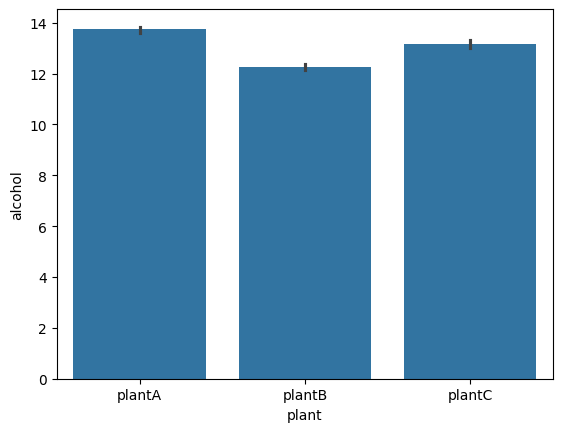

In [241]:
sns.barplot(x='plant', y='alcohol', data=df_wine)

<Axes: xlabel='plant', ylabel='alcohol'>

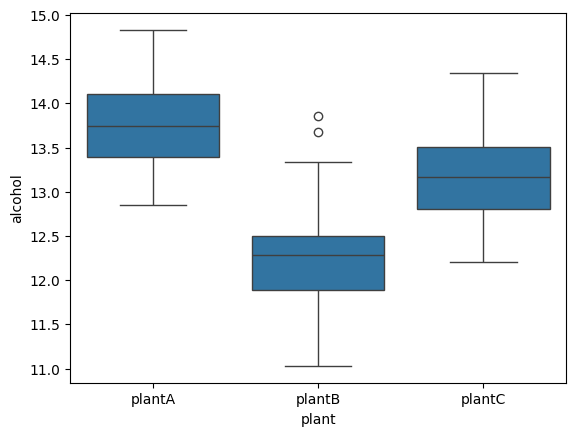

In [242]:
sns.boxplot(x='plant', y='alcohol', data=df_wine)

### <font color='darkorange'>Data wrangling</font>



Before building our models we have to do some preprocessing steps with our data. We'll cover some common steps here, but we'll see more along the way.

Let's first consider categorical predictor variables.

**Preprocessing (categorical input variables)**
> Convert the categorical 'lab' variable using onehot encoding (i.e., create many dummy columns to replace the one categorical column).

> Note: we could also convert the categories to numbers (Ordinal) but this assumes that there is an order to the categories which isn't always a good assumption.

In [243]:
#categorical variables
cat_names = ['lab']

#create dummy variables
df_cat = pd.get_dummies(df_wine[cat_names])

#take a look
df_cat

,lab_lab1,lab_lab2,lab_lab3
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
173,False,False,True
174,True,False,False
175,False,False,True
176,True,False,False


In [244]:
#add them back to the original dataframe
df_wine = pd.concat([df_wine,df_cat], axis=1)

#remove the old columns
df_wine = df_wine.drop(cat_names, axis=1)

#take a look
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab_lab1,lab_lab2,lab_lab3
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,True,False,False
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,False,True,False
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,False,False,True
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,plantA,True,False,False
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,plantA,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,plantC,False,False,True
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,plantC,True,False,False
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,plantC,False,False,True
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,plantC,True,False,False


Next let's look at how we might convert a categorical outcome variable.

**Preprocessing (categorical outcome variable)**
> As the outcome variable is categorical we will convert each category into a number, and unlike the onehot encoding we will keep these numbers within the same column.

In [245]:
from sklearn.preprocessing import LabelEncoder

#create the encoder
le_plants = LabelEncoder()

#create outcome variable
df_wine['plant'] = le_plants.fit_transform(df_wine['plant'])

#take a look
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab_lab1,lab_lab2,lab_lab3
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,True,False,False
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,False,True,False
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,False,False,True
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,True,False,False
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,False,False,True
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,True,False,False
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,False,False,True
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,True,False,False


We can then always get back what plant category corresponds to which numeric label.

In [246]:
le_plants.classes_

array(['plantA', 'plantB', 'plantC'], dtype=object)

**Training testing split**

We will follow a general approach when building models. We will divide the dataset into *training* and *testing* datasets.
This lets us fit the model to one part of the data and then use the withheld data to test the predictions of the model. This helps us detect and avoid *overfitting* our model!

To do this we'll first split the dataframe into inputs and target variables. I.e., we'd like to use X to predict y. Then we split each into training and testing sets. This makes it easier to work with sklearn.

In [247]:

#split data into predictors (X) and target (y)
X = df_wine.drop('plant', axis=1)
y = df_wine['plant']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)


Now that we've split our data, we can do some more processing. Here let's scale our numeric variables. Importantly, we'll build our scaling function from the training data and apply it to the testing. That way we are only using information from the training data and not contaminating our model with testing data information as well. I.e., no data leakage between training and testing datasets.

**Preprocessing (numeric variables)**

In [248]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler

#numeric variables
numb_names = X_train.drop(['lab_lab1','lab_lab2','lab_lab3'],axis=1).select_dtypes('number').columns.tolist()

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

#use the fit from the training data to transform the test data
X_test[numb_names] = sc.transform(X_test[numb_names])

#take a look
X_train


,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,lab_lab1,lab_lab2,lab_lab3
117,-0.629019,-0.644352,-0.930452,1.093005,0.745368,0.411262,-0.538562,0.001756,-0.170253,-0.087153,-1.315382,0.482386,0.458464,-1.307469,True,False,False
150,0.669369,0.773546,0.791022,-0.898135,1.178067,1.390635,-1.467302,-0.494630,-1.091207,-0.693734,1.438412,-1.638555,-1.943983,-0.832004,True,False,False
85,-0.328466,-1.235925,-0.730280,-1.052787,-0.552727,-0.176362,-0.228982,-0.141433,-0.477238,-0.339895,-1.079583,1.249534,0.747916,-0.985380,True,False,False
91,-1.133947,-0.738252,-0.009663,0.571056,0.601136,-1.025152,-1.389907,-0.800098,1.057686,-0.053454,-0.666935,0.437259,0.009815,-0.985380,False,False,True
3,1.715292,-0.325090,0.310611,-0.608163,-0.898885,0.737719,2.325052,1.338179,-0.937715,0.873268,1.101557,-0.420142,1.167621,2.174168,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.592952,0.689035,0.871091,0.126432,2.043464,-0.306945,-0.693352,-1.439672,2.055387,-0.879078,0.975236,-1.277544,-1.321662,0.333655,True,False,False
55,0.741501,-0.531671,0.150474,-0.298860,0.168437,0.933594,0.947421,0.660421,-1.244700,1.328204,0.448899,0.121374,0.559772,1.069860,False,False,True
176,0.272639,0.275873,-0.209835,0.725708,0.024205,1.194760,-1.080327,-1.344213,1.287925,-0.339895,1.733161,-1.593429,-1.480860,0.210954,True,False,False
144,-0.833394,1.487189,-0.890418,0.049106,-0.408494,0.672428,-1.498260,-1.248755,-0.553984,-0.879078,1.274195,-1.367797,-0.930902,0.256967,True,False,False


In [249]:
X_test

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,lab_lab1,lab_lab2,lab_lab3
99,-0.785306,0.820496,-0.850383,-1.362091,-0.552727,-0.894569,0.777152,0.860885,0.673955,1.934786,-1.214326,2.106936,0.270321,-1.120351,False,True,False
169,0.549148,2.163273,1.751845,-2.521979,1.466532,0.672428,-0.569520,-1.076929,-0.707476,-0.929627,1.396305,-1.277544,-1.046683,-0.433226,True,False,False
138,0.657347,1.214878,-0.930452,-0.124877,-0.120028,-0.894569,-1.126764,-1.535131,1.671656,-1.317165,0.217311,-0.645774,-1.191409,-0.586602,False,False,True
118,-0.208245,1.064637,-1.771172,-0.762815,-1.129658,-1.416902,-1.111285,-0.800098,0.520463,-1.401412,-0.751149,-1.142165,-0.757232,-1.224646,False,True,False
75,-1.542699,-0.390820,-2.011377,-0.492175,-1.129658,-0.306945,-1.142243,-0.494630,-0.170253,-0.862229,-0.582721,1.249534,-0.728286,-1.052865,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-0.412621,-0.897883,-2.091446,0.783702,-0.408494,-0.894569,-1.389907,-0.695094,-0.553984,-0.525239,-1.151165,0.392133,0.183486,-0.641817,True,False,False
37,0.128374,-0.606791,0.510782,-1.748720,-0.552727,-0.241654,0.157992,0.326315,-0.553984,-0.373594,-0.393240,0.753144,-0.192801,1.023847,True,False,False
41,0.561170,1.449629,-1.210692,-0.569501,-0.321954,-0.763986,0.157992,0.564962,-0.707476,-0.306196,-0.380608,-0.194510,0.516355,0.809121,False,False,True
62,0.873744,-0.982393,-2.011377,1.324983,-0.552727,-0.502820,-0.383772,-0.284621,-0.323745,-1.569907,-0.582721,1.249534,-0.265164,-0.433226,False,False,True


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Model building</font>


Here we will build our first decision tree!

In [250]:
from sklearn.tree import DecisionTreeClassifier

#1. build the algorithm
classifier = DecisionTreeClassifier()

#2. fit the algorithm to the data
classifier_res = classifier.fit(X_train, y_train)


**Predictions**

Make some predictions on the testing data

In [251]:
y_pred = classifier.predict(X_test)

Measure classification success

In [252]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[25  1  0]
 [ 2 35  0]
 [ 0  0 25]]


Text(50.722222222222214, 0.5, 'True label')

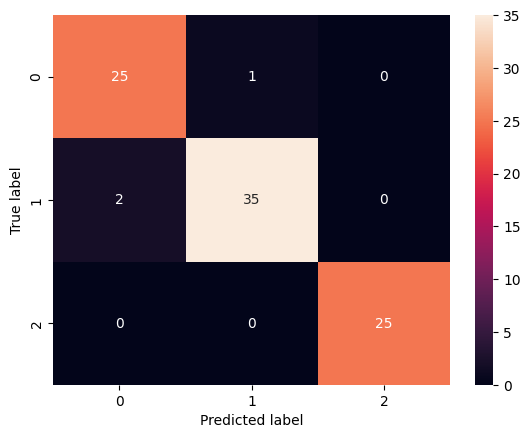

In [253]:
#more visual approach
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

More detailed metrics?

In [254]:
print(f'Accuracy: {sk.metrics.accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {sk.metrics.precision_score(y_test, y_pred, average='micro'):.2f}')
print(f'Recal: {sk.metrics.recall_score(y_test, y_pred, average='micro'):.2f}')

Accuracy: 0.97
Precision: 0.97
Recal: 0.97


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Hyperparameters</font>


Decision tree algorithms have a number of hyperparameters that can be tuned to acheive better predictions. Let's take a look at one and how we can tune it!



First we need some way to test how model performance varies as we change the parameter. We can't use the testing dataset... if we did it really wouldn't be a good test. I.e., the testing data would be used to help build the model and so would not be independent.

So let's split the training dataset again! This will create training and validation datasets!

In [255]:
X_hyper_train, X_hyper_val, y_hyper_train, y_hyper_val = train_test_split(X_train, y_train, test_size=0.20)

Let's next focus on the max depth parameter, and see if we can find a value that maximizes the performance of the model on the validation dataset.


> We'll first build a function that takes as input max depth, and outputs the accuracy score.

> We'll then use a loop to try out many max depth scores.

> Finally we'll plot the the accuracy scores for each max depth value.

Let's first build a function the takes max depth as input and outputs a accuracy score.

In [256]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# def fit_decision_tree(maxDep):

#   #1. build the algorithm
#   classifier = DecisionTreeClassifier(max_depth=maxDep)

#   #2. Fit the algorithm
#   classifier_res = classifier.fit(X_hyper_train, y_hyper_train)

#   #3. Make predictions
#   y_pred = classifier.predict(X_hyper_val)

#   #4. Meausure the accuracy
#   accuracy_measured = accuracy_score(y_hyper_val, y_pred)

#   return accuracy_measured

In [257]:
def fit_decision_tree(maxDep):

  #1. build the algorithm
  classifier1 = DecisionTreeClassifier(max_depth=maxDep)

  #2. Fit the algorithm
  classifier_res1 = classifier1.fit(X_hyper_train, y_hyper_train)

  #3. Make predictions
  y_pred = classifier1.predict(X_hyper_val)

  #4. Meausure the accuracy
  accuracy_measured = sk.metrics.accuracy_score(y_hyper_val, y_pred)

  return accuracy_measured

Try out your new function!

In [258]:
fit_decision_tree(2)

0.8888888888888888

Next let's build a loop and see what values of max depth give the best results!

In [259]:
acc_scores = []
for i in range(1,10):
  acc_s = fit_decision_tree(i)
  acc_scores.append(acc_s)

Then let's plot it!

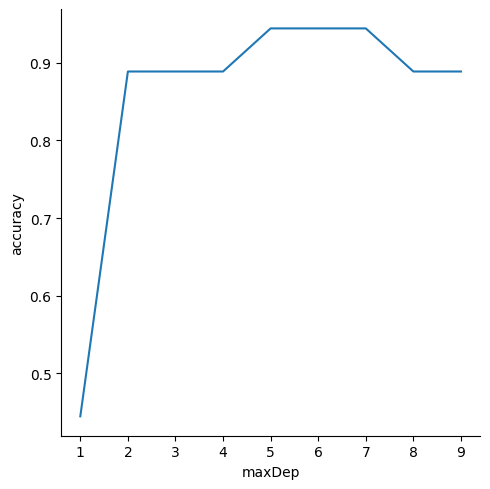

In [260]:
#create a dataframe
df_plot_maxDep = pd.DataFrame({'accuracy':acc_scores, 'maxDep':range(1,10)})

#make a plot
sns.relplot(x = 'maxDep', y = 'accuracy', data = df_plot_maxDep, kind='line')

### <font color='darkorange'>Bonus</font>


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Try this exercise again but this time use min_samples_split. Which is the parameter that defines when splits are no longer considered (e.g., if a leaf has 10 points in it and min_samples_split is 11 then the algorithm will not look to split the leaf).



<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Model interpretation</font>

In [261]:
!pip install dtreeviz
import dtreeviz

Decision trees can offer some nice visuals that can help interpret and communicate your results, lets take a look at a few.

First let's see how what splits the model found in the training data, and how many data points fell within each leaf.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


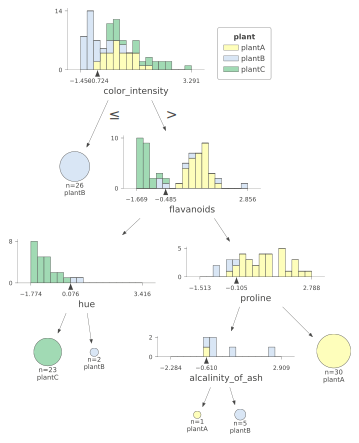

In [262]:
#build the figure
viz = dtreeviz.model(classifier_res, X_train, y_train,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'}
                )

#take a look
viz.view(fontname="DejaVu Sans")

Now let's look at how the tree does with the test data.

In this case, we can see how the test samples fall into the fixed structure of the tree. Do you see any big differences in leaf sizes and mixtures?

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


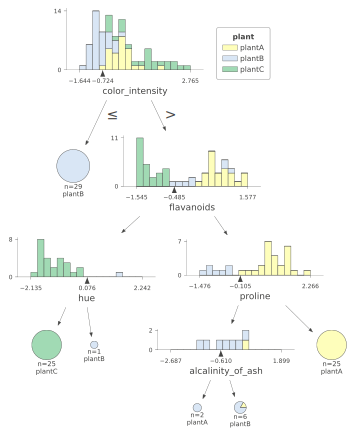

In [268]:
#build the figure
viz_test = dtreeviz.model(classifier_res, X_test, y_test,
                target_name="plant",
                feature_names=X_test.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'}
                )

#take a look
viz_test.view(fontname="DejaVu Sans")

Finally, let's see how one data point in the test data gets place within the tree.

In [281]:
#Vizualize one prediction
import numpy as np

# pick a X test point
X_values_for_pred = X_test.iloc[10] #you can choose any other row!

X_values_for_pred

,68
alcohol,0.477015
malic_acid,-1.273485
ash,-0.249869
total_sugar,0.203758
alcalinity_of_ash,-0.841192
magnesium,0.541845
total_phenols,0.281824
flavanoids,-0.752369
nonflavanoid_phenols,1.441417
proanthocyanins,-2.092241


/usr/local/lib/python3.12/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.12/dist-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


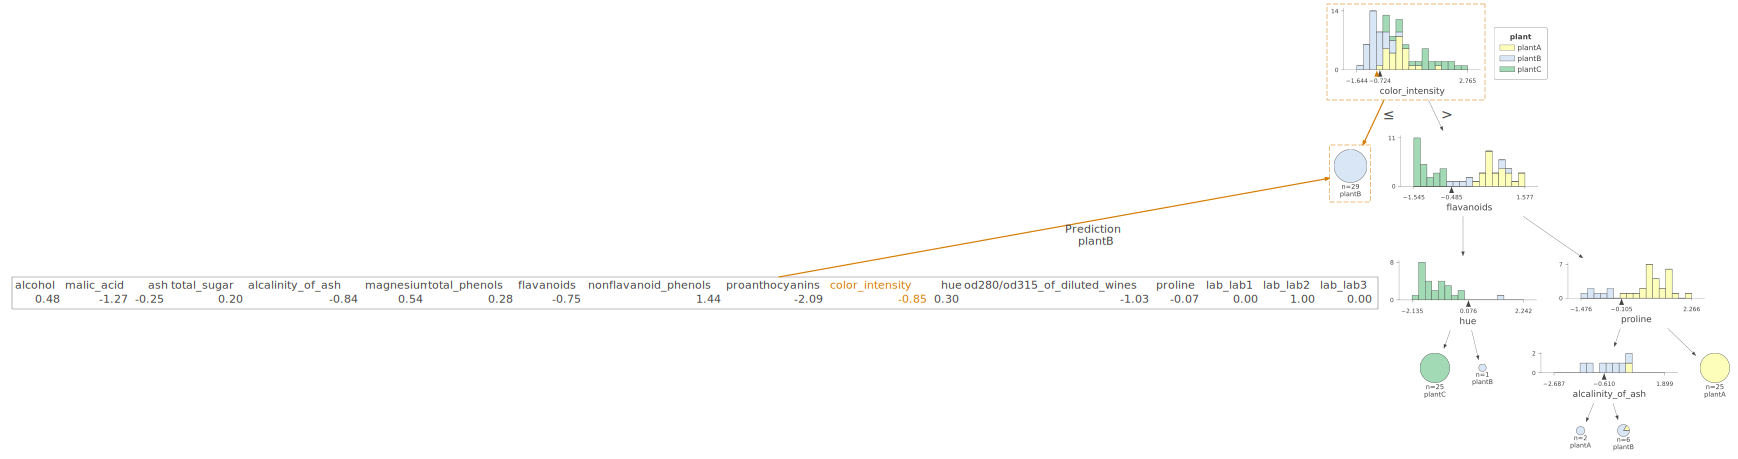

In [282]:
viz_obj = viz_test.view(
    x=X_values_for_pred,
    fontname="DejaVu Sans"
)

viz_obj

### <font color='darkorange'>Bonus 2</font>

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Now that you know how to use decision tree models, try finding another dataset and see if you can make useful predictions? Can you explain what features are helping you to make those predictions?

Note: decision trees work well for both categorical outcome variables (as shown above) and continuous/integer outcome variables. The difference is in how the splits are made:
* categorical models split based on class impurity e.g., gini impurity or entropy.
* regressor models split based on variation e.g., mean squared error.

In [266]:
#load a dataset

### <font color='darkorange'>Further reading</font>

> If you would like the notebook without missing code check out the [full code](https://colab.research.google.com/github/tbonne/peds/blob/main/docs/fullNotebooks/full_IntroModeling3_decisionTrees.ipynb) version.